In [59]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#SciKit Learn Models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [55]:
data = pd.read_csv("/home/anitha/Documents/ML_Project/data_1/first-gop-debate-twitter-sentiment (2)/Sentiment.csv")

In [56]:
data.fillna(value=0,inplace=True)
dropdata = data.drop(['id','candidate','relevant_yn','name','text','tweet_coord','tweet_created','tweet_id','tweet_location','user_timezone'],axis=1)

In [57]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)

In [58]:
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')
cat_columns = dropdata.select_dtypes(['category']).columns
#print cat_columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
#print dropdata

Index([u'subject_matter', u'candidate_gold', u'relevant_yn_gold',
       u'sentiment_gold', u'subject_matter_gold', u'sentiment', u'Unnamed: 22',
       u'Unnamed: 23', u'Unnamed: 24'],
      dtype='object')


In [50]:
def dec_tree(X_train,Y_train,X_test,Y_test,Models):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

In [51]:
def ModelSVC(X_train,Y_train,X_test,Y_test,Models):
    clf = SVC(kernel = 'rbf', gamma = 0.5, C = 3)
    # 'kernel': 'rbf', 'gamma': 0.5, 'C': 3
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    Models['SVM'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

In [52]:
def bayes(X_train,Y_train,X_test,Y_test,Models):
    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)
    Y_pred = gaussian.predict(X_test)
    Models['Bayes'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

In [53]:
def run_all_and_Plot(df):
    Models = dict()
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_all = df.drop(['sentiment'], axis=1)
    X_all = scaler.fit_transform(X_all)
    y_all = df['sentiment']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    dec_tree(X_train,Y_train,X_test,Y_test,Models)
    ModelSVC(X_train,Y_train,X_test,Y_test,Models)
    bayes(X_train,Y_train,X_test,Y_test,Models)
    return Models

In [32]:
def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of different models')
    plt.show()

In [33]:
def plot_cm(dict):
    count = 1
    fig = plt.figure(figsize=(10,10))
    for model in dict:
        cm = dict[model][1]
        labels = ['W','L','N','D']
        ax = fig.add_subplot(4,4,count)
        cax = ax.matshow(cm)
        plt.title(model,y=-0.8)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        #plt.subplot(2,2,count)
        count+=1
    plt.tight_layout()
    plt.show()


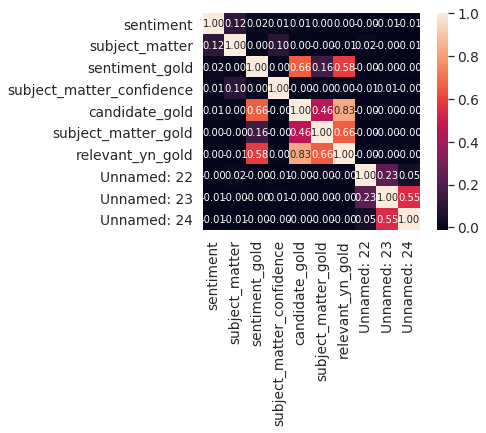

In [60]:
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'sentiment')['sentiment'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

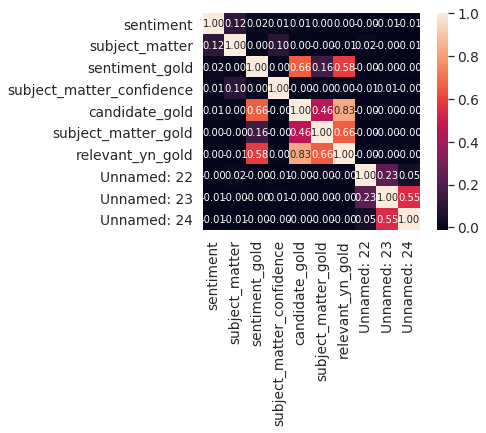

In [61]:
newDF = dropdata#.drop(['Max_round','Last_round','B_HomeTown','B_Location','R_HomeTown','R_Location'],axis=1)
blue_cols = [col for col in dropdata.columns if 'B__' in col]
red_cols = [col for col in dropdata.columns if 'R__' in col]
b_feats = list(set([x[10:] for x in blue_cols if "Round" in x]))
r_feats = list(set([x[10:] for x in red_cols if "Round" in x]))
def sumfeat(b_feats,cols):
    for x in b_feats:
        newDF.loc[:,x] = 0
        for y in cols:
            if x in y:
                newDF[x] += newDF[y]
                newDF.drop(y,axis=1,inplace=True)
sumfeat(b_feats,blue_cols)
sumfeat(r_feats,red_cols)
corrmat = newDF.corr()
cols = corrmat.nlargest(k, 'sentiment')['sentiment'].index
cm = np.corrcoef(newDF[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

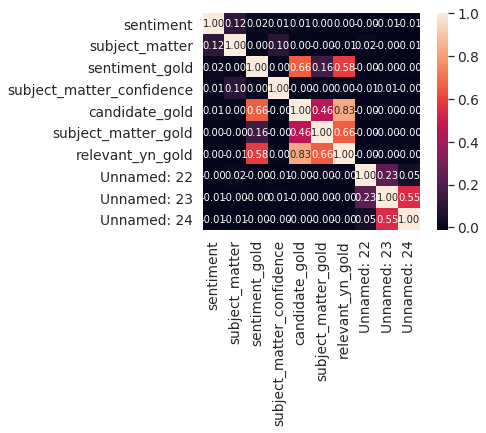

,candidate_confidence,relevant_yn_confidence,Unnamed: 5,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,sentiment,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,13871.000000,13871.000000,13871.0,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000
mean,0.855689,0.927304,0.0,0.756936,7.027900,0.782801,0.010237,0.002307,45.803331,0.001802,0.006633,0.548915,0.025305,0.000721,0.000072
std,0.241388,0.141696,0.0,0.217682,3.368202,0.258215,0.257063,0.047977,153.981724,0.064081,0.209264,0.755015,0.523157,0.046502,0.008491
min,0.222200,0.333300,0.0,0.186000,0.000000,0.222200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.674200,1.000000,0.0,0.651700,2.000000,0.641300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.0,0.681300,9.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.0,1.000000,9.000000,1.000000,0.000000,0.000000,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,12.000000,1.000000,9.000000,1.000000,4965.000000,4.000000,10.000000,2.000000,17.000000,4.000000,1.000000


In [62]:
ratio = newDF.copy()
blue_cols = [col for col in ratio.columns if 'B__' in col]
red_cols = [col for col in ratio.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    ratio[newkey] = ratio[str(blue)]/ratio[str(red)]
    del ratio[str(blue)]
    del ratio[str(red)]
corrmat = ratio.corr()
cols = corrmat.nlargest(k, 'sentiment')['sentiment'].index
cm = np.corrcoef(ratio[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
ratio.describe()

SVM 0.6129729729729729
Bayes 0.23135135135135135
Decision Tree 0.5708108108108109


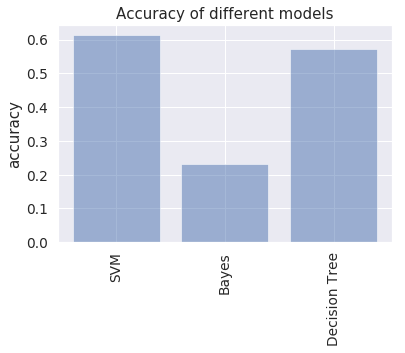

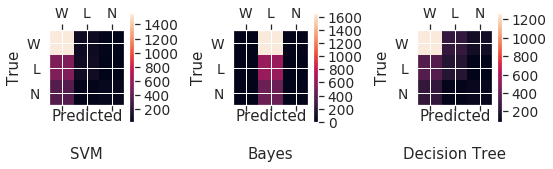

In [63]:
accuracies = run_all_and_Plot(dropdata)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

SVM 0.6129729729729729
Bayes 0.23135135135135135
Decision Tree 0.5657657657657658


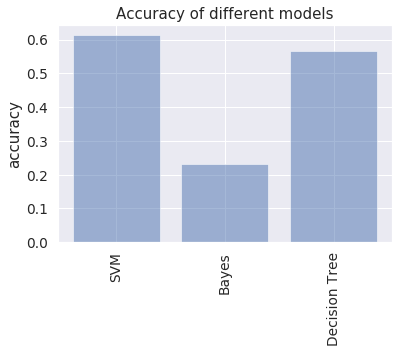

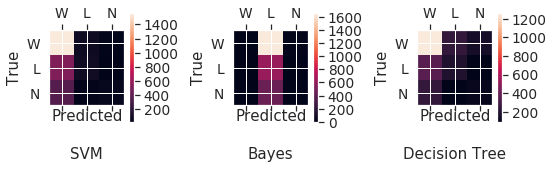

In [64]:
accuracies = run_all_and_Plot(newDF)
# CompareAll = dict()
CompareAll['Summed'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

SVM 0.6129729729729729
Bayes 0.23135135135135135
Decision Tree 0.5654054054054054


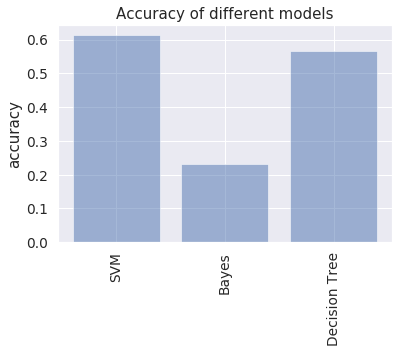

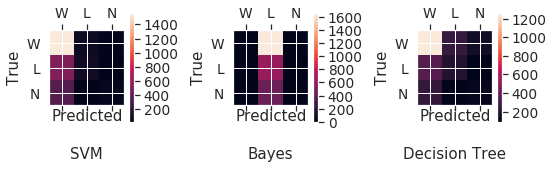

In [65]:
accuracies = run_all_and_Plot(ratio)
# CompareAll = dict()
CompareAll['Ratio'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

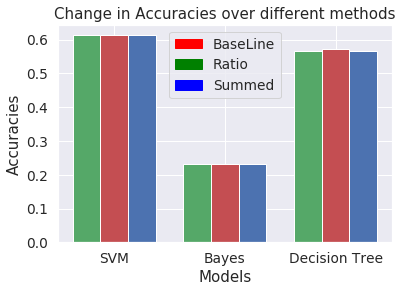

In [66]:
def graph_plot(values):
    import matplotlib.patches as mpatches
    N = 3 #no of models
    ind = np.arange(N)  # the x locations for the groups
    width = 0.25     # the width of the bars
    offset=0
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (12,12)

    order = list()
    for value in values['Ratio']:
        order.append(value[0])
    
    foo_ratio = list()
    foo_baseline = list()
    foo_summed = list()
    for element in values['Ratio']:
        foo_ratio.append(element[1])
    
    
    for element in values['Baseline']:
        foo_baseline.append(element[1])
    
    
    for element in values['Summed']:
        foo_summed.append(element[1])
    
    
    rects = ax.bar(ind+width*offset, foo_ratio, width, color = 'g')
    offset+=1
    rects = ax.bar(ind+width*offset, foo_baseline, width, color = 'r')
    offset+=1
    rects = ax.bar(ind+width*offset, foo_summed, width, color = 'b')
    
#     for key in values:
#         rects = ax.bar(ind+width*offset, values[key], width)
#         # bars.append(rects)
#         offset+=1 
    ax.set_ylabel('Accuracies')
    ax.set_xlabel('Models')
    ax.set_title('Change in Accuracies over different methods')
    ax.set_xticks(ind+2*width/2)
    ax.set_xticklabels(order)
    
    
    red_patch = mpatches.Patch(color='red', label='BaseLine')
    green_patch = mpatches.Patch(color='green', label='Ratio')
    blue_patch = mpatches.Patch(color='blue', label='Summed')
    
    
    plt.legend(handles=[red_patch,green_patch,blue_patch])
    
    
    plt.show()


model_accuracies = dict()
# print(CompareAll)

for key in CompareAll:
    temp = list()
    for model in CompareAll[key]:
        temp.append([model,CompareAll[key][model][0]])
    model_accuracies[key] = temp
    


graph_plot(model_accuracies)